### Project goal: Forecast the temperatures for Berlin-Tempelhof

Exercise in three notebooks:
1. Inspect the raw data and apply trend, seasonality and AR modelling manually and automatically using `statsmodels` package to predict temperature.
2. Use ARIMA and SARIMAX modelling to predict temperature.
3. Plot the predicted temperatures using Plotly

This is notebook 2.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

As we have seen before when we performed autoregression modelling, a stationary time series is one that does not have any trend or seasonality. It is essential to remove any trend or seasonality before modeling the time series data. We will now use an Autoregressive-Integrated-Moving-Average (ARIMA) Model to see whether we can improve our results. Following that, we do a Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model (SARIMAX) modelling approach to see whether we can do even better.  

But before we start, let's see how the ARIMA method is used:  

p = autoregression component - define how many lags to include in the model (use pacf)  
d = differencing component: detrend the model by determining the order of differencing should be applied before modelling AR and MA parts  
q = moving average (MA) component: regression models on past error and q denotes the number of lags to include (use acf) -> largest lag value is often estimated q if autocorrelations cut off. If they don't you either have an autoregressive model (q=0) or an ARIMA model with a positive p and q.  

Before we start modelling, read in the data:

In [3]:
df_all = pd.read_pickle("df_all.pkl")
df_train = pd.read_pickle("df_train.pkl")
df_test = pd.read_pickle("df_test.pkl")

Let's first try out the ARIMA model on train data: define model, train model and evaluate (metrics and plot)

Run ARIMA on training data...


c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Training data
ARIMA Model (r2 / MSE):
		0.9159 / 5.2467


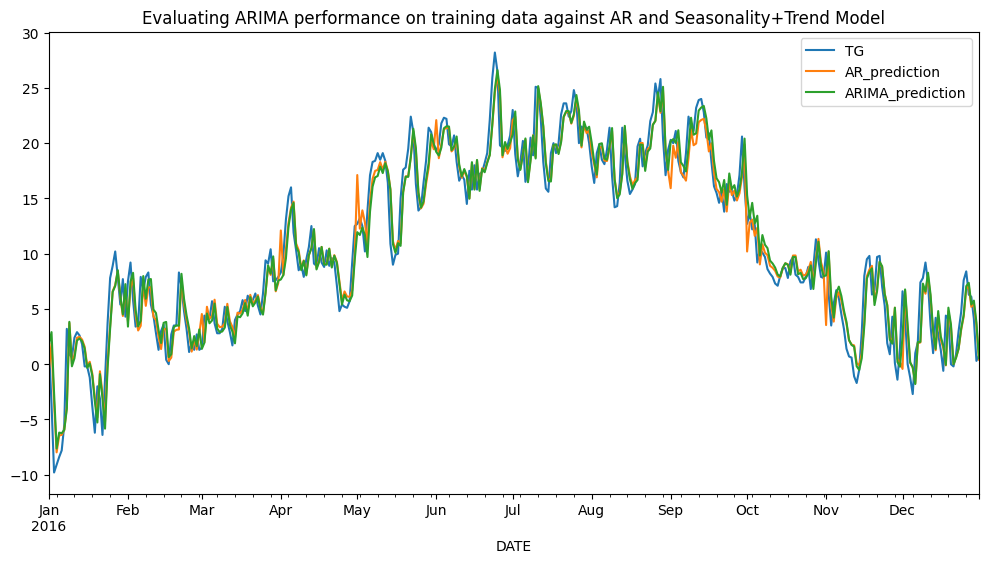

In [4]:
print("Run ARIMA on training data...")
model_ARIMA = ARIMA(df_train["TG"], order=(1, 1, 3))
model_ARIMA_train = model_ARIMA.fit() # you can add seasonality factors here as well to make this a SARIMA model
df_train["ARIMA_prediction"] = model_ARIMA_train.predict()
_fig, ax1 = plt.subplots(figsize=(12, 6))
df_train.loc[df_train.index.year == df_train.index.year[-1]][
    ["TG", "AR_prediction", "ARIMA_prediction"]
].plot(ax=ax1, title="Evaluating ARIMA performance on training data against AR and Seasonality+Trend Model")
print("Training data")
print(
    f"ARIMA Model (r2 / MSE):\n\t\t{r2_score(df_train['TG'], df_train['ARIMA_prediction']):.4f} /"
    f" {mean_squared_error(df_train['TG'], df_train['ARIMA_prediction']):.4f}"
)

We could also train the ARIMA Model on the test data: define model, train model and evaluate (metrics and plot)

Run ARIMA on test data...


c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     TG   No. Observations:                 1826
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -3985.051
Date:                Tue, 20 Dec 2022   AIC                           7980.102
Time:                        09:59:53   BIC                           8007.649
Sample:                    01-01-2017   HQIC                          7990.264
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4302      0.079      5.469      0.000       0.276       0.584
ma.L1         -0.3831      0.081     -4.716      0.000      -0.542      -0.224
ma.L2         -0.3071      0.025    -12.390      0.0

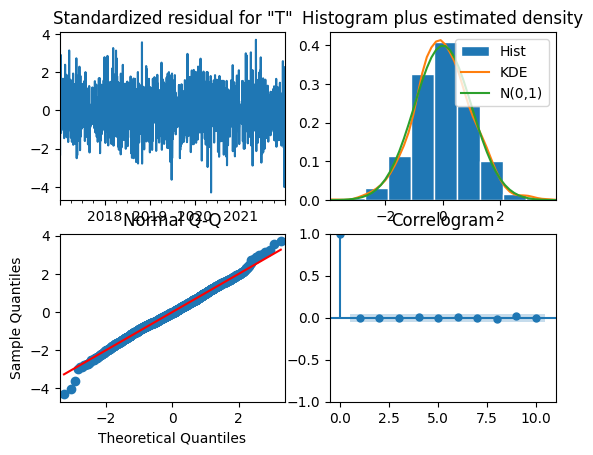

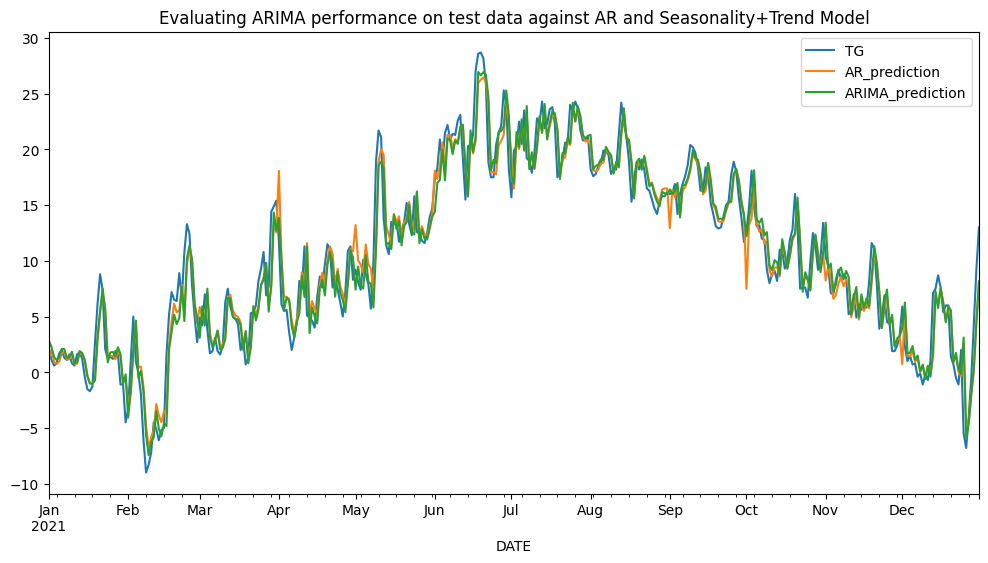

In [5]:
print("Run ARIMA on test data...")
model_ARIMA = ARIMA(df_test["TG"], order=(1, 1, 3))
model_ARIMA_test = model_ARIMA.fit()
print(model_ARIMA_test.summary())
p = model_ARIMA_test.plot_diagnostics()
df_test["ARIMA_prediction"] = model_ARIMA_test.predict()
_fig, ax2 = plt.subplots(figsize=(12, 6))
df_test[df_test.index.year == df_test.index.year[-1]][["TG", "AR_prediction", "ARIMA_prediction"]].plot(
    ax=ax2, title="Evaluating ARIMA performance on test data against AR and Seasonality+Trend Model"
)
print("Test data")
print(
    "Autoregressive Model (r2 /"
    f" MSE):\n\t\t{r2_score(df_train['TG'], df_train['AR_prediction']):.4f} /"
    f" {mean_squared_error(df_train['TG'], df_train['AR_prediction']):.4f}"
)
print(
    f"ARIMA Model (r2 / MSE):\n\t\t{r2_score(df_train['TG'], df_train['ARIMA_prediction']):.4f} /"
    f" {mean_squared_error(df_train['TG'], df_train['ARIMA_prediction']):.4f}"
)

Or similarly, apply an ARIMA model on the entirety of the data: define model, train model and evaluate (metrics and plot)

Run ARIMA on all data...


c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\miche\anaconda3\envs\spiced_academy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot: title={'center': 'Evaluating ARIMA performance on all data against AR and Seasonality+Trend Model'}, xlabel='DATE'>

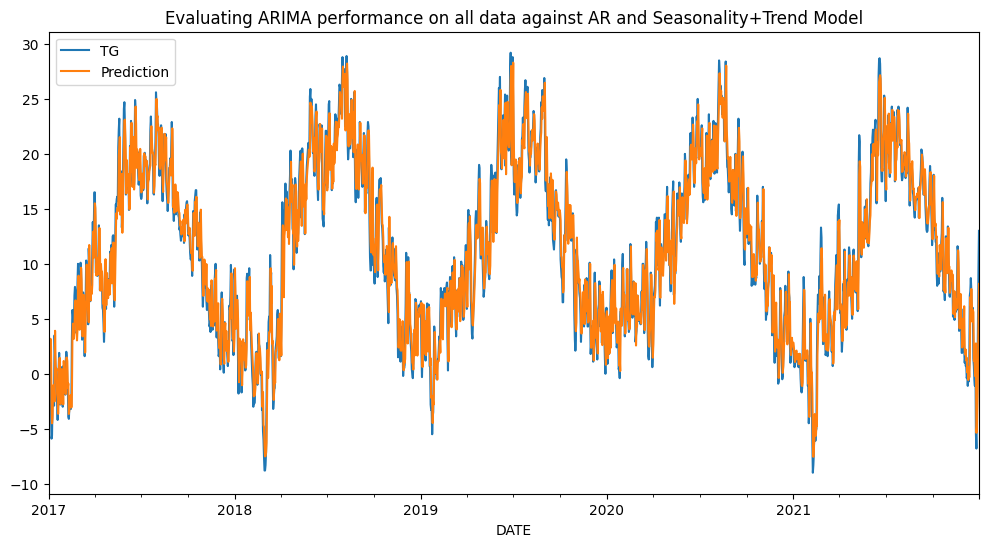

In [6]:
print("Run ARIMA on all data...")
model_ARIMA = ARIMA(df_all["TG"], order=(1, 1, 3))
model_ARIMA_all = model_ARIMA.fit()
start = len(df_train)
end = len(df_train) + len(df_test) - 1
prediction = model_ARIMA_all.predict(start, end, typ="linear").rename("Prediction")
_fig, ax3 = plt.subplots(figsize=(12, 6))
df_test["TG"].plot(legend=True, ax=ax3)
prediction.plot(legend=True, ax=ax3, title="Evaluating ARIMA performance on all data against AR and Seasonality+Trend Model")

But what we actually want to do is to forecast, or predict upcoming, temperatures. So let's do that for following period:

<AxesSubplot: title={'center': 'Using ARIMA to predict the future'}, xlabel='DATE'>

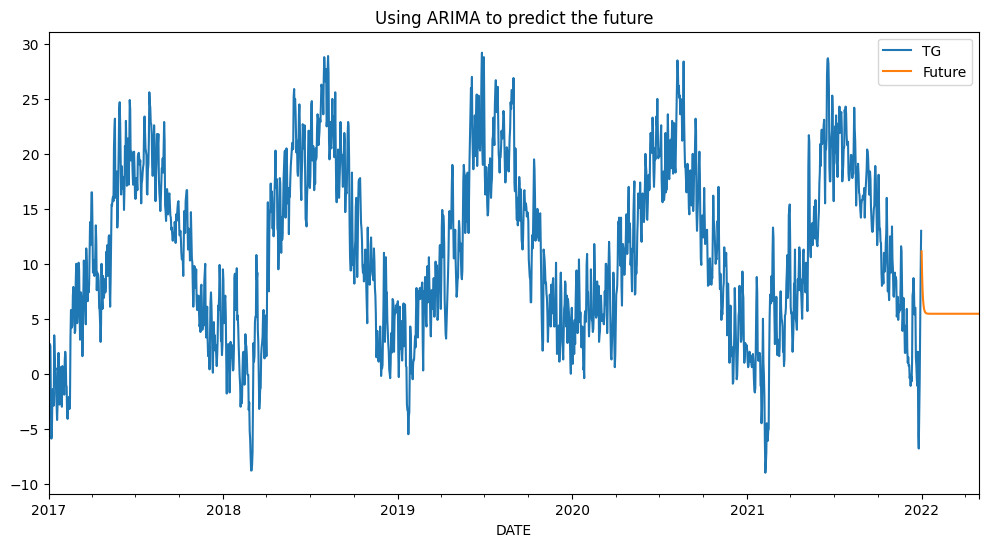

In [7]:
TIME_PERIOD = 120 # days in the future
prediction_future = model_ARIMA_all.predict(len(df_all), len(df_all) + TIME_PERIOD, typ="levels").rename(
    "Future"
)
_fig, ax4 = plt.subplots(figsize=(12, 6))
df_test["TG"].plot(legend=True, ax=ax4)
prediction_future.plot(legend=True, title="Using ARIMA to predict the future", ax=ax4)

We don't really improve above the AR model and our future prediction is very poor. This is because the classic ARIMA doesn't model seasonality. But note that we could do a SARIMA model calling the same method from statsmodels in order to perform seasonal differencing. Seasonal differencing is similar to regular differencing but instead of substracting consecutive terms, we substract the value from previous season.  
The representation is the following:  
SARIMAX  
Function described as: SARIMAX(p,d,q)x(P,D,Q)lag  
p and seasonal P: indicates the number of autoregression terms (lags of the stationary series)  
d and seasonal D: indicates differencing that must be done to stationary series  
q and seasonal Q: indicates the number of moving average terms (lags of the forecast errors)  
lag: indicates the seasonal length in the data  
Small letters is the order of AR components, while capital letters is for seasonality component  
or put differently:  
AR term (p) which is lags of dependent variables, e.g. predictors for x(t) is x(t-1) + x(t-2) + x(t-3).  
Differentiation (d) which is the d number of occasions where we apply differentiation.  
MA term (q) which is lags for errors in prediction, e.g. predictor for x(t) is e(t-1) + e(t-2) + e(t-3), where e(i) is the difference between the moving average value and the actual value.  
As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.  

However, let's skip SARIMA and directly move on to another model that also includes seasonality: SARIMAX. The added X stands for exogenous variable. With that variable we could force a (exogenous) predictor into the model. For example, we could force the recent seasonality, say the one of the last 3 years, into the model. Note: that this is on top of the general seasonality we will model anyways (denoted by the keyword argument "seasonal_order").  

<br>
Since can't really test on daily period because we run out of memory fairly quickly and crash. So we resample the data to monthly.

In [8]:
df_all = df_all.resample(rule="M").mean()
df_test = df_test.resample(rule="M").mean()
df_train = df_train.resample(rule="M").mean()

Start training a SARIMAX model on Training data but without an exogenous variable (essentially SARIMA) and evaluate its prediction:



Run SARIMAX on training data...
SARIMAX Model (r2 / MSE):
		0.9255 / 3.6279


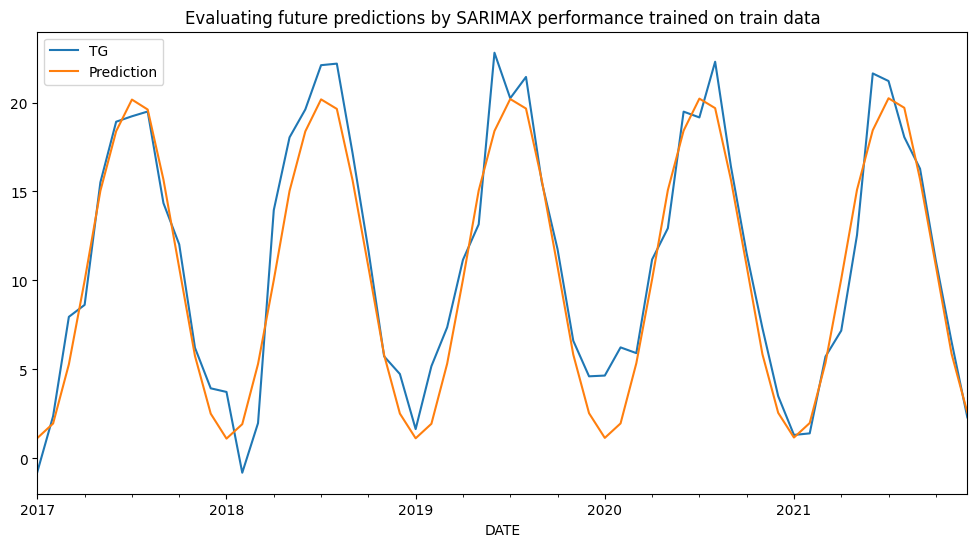

In [9]:
print("\n\nRun SARIMAX on training data...")
model_SARIMAX = SARIMAX(df_train["TG"], order=(1, 1, 3), seasonal_order=(1, 1, 3, 12))
res_train = model_SARIMAX.fit()
start = len(df_train)
end = len(df_train) + len(df_test) - 1
prediction = res_train.predict(start=start, end=end, typ="levels").rename("Prediction")
_fig, ax5 = plt.subplots(figsize=(12, 6))
df_test["TG"].plot(legend=True, ax=ax5)
prediction.plot(legend=True, ax=ax5, title="Evaluating future predictions by SARIMAX performance trained on train data")
print(
    f"SARIMAX Model (r2 / MSE):\n\t\t{r2_score(df_test['TG'], prediction):.4f} /"
    f" {mean_squared_error(df_test['TG'], prediction):.4f}"
)

Start training a SARIMAX model on All data but without an exogenous variable (essentially SARIMA) and predict the next period:


Run SARIMAX on all data...


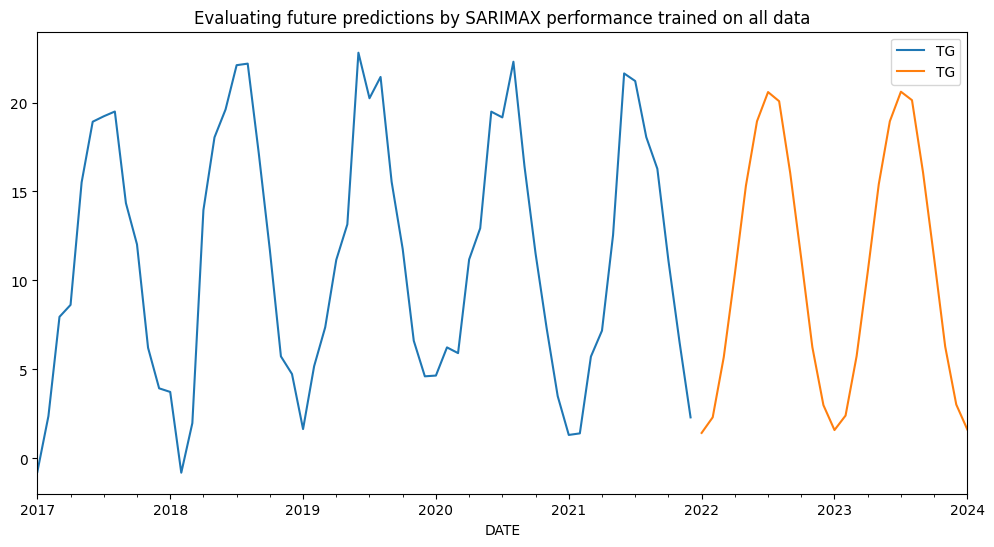

In [10]:
print("\nRun SARIMAX on all data...")
model_SARIMAX = SARIMAX(df_all["TG"], order=(1, 1, 3), seasonal_order=(1, 1, 3, 12))
res_all = model_SARIMAX.fit()
TIME_PERIOD = 24  # months predicted in advance the unit of period depends on your resampling
prediction_future = res_all.predict(
    start=len(df_all), end=len(df_all) + TIME_PERIOD, typ="levels"
).rename("Future")
prediction_future = prediction_future.to_frame(name="TG")
_fig, ax6 = plt.subplots(figsize=(12, 6))
df_test["TG"].plot(legend=True, ax=ax6)
prediction_future.plot(legend=True, ax=ax6, title="Evaluating future predictions by SARIMAX performance trained on all data")
plt.show()

In [11]:
# Store predictions to use in a map (see the next notebook)
prediction_future.to_pickle("prediction_future.pkl")